In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df= pd.read_csv(r"C:\Users\Poonam\Desktop\Python\Datasets-20221212T140536Z-001\Datasets\diabetes.csv")

In [3]:
df

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             50             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3        150             66             23       94  28.1   
4        150             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   52        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [4]:
x=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

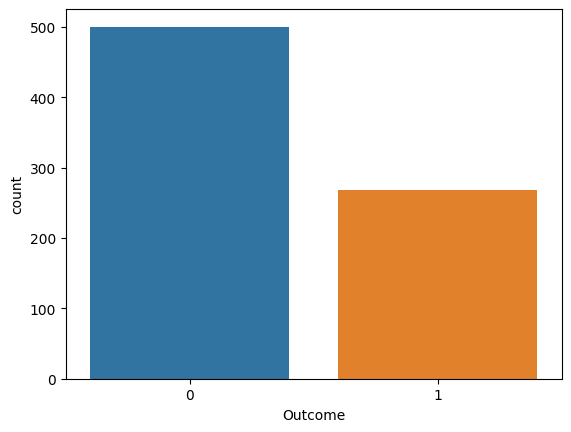

In [6]:
sns.countplot(x=df["Outcome"])

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [8]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)
x_test

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
44       159             64              0        0  27.4   
672       68            106             23       49  35.5   
700      122             76             27      200  35.9   
630      114             64              0        0  27.4   
81        74              0              0        0   0.0   
..       ...            ...            ...      ...   ...   
32        88             58             11       54  24.8   
637       94             76             18       66  31.6   
593       82             52             22      115  28.5   
425      184             78             39      277  37.0   
273       71             78             50       45  33.2   

     DiabetesPedigreeFunction  Age  
44                      0.294   40  
672                     0.285   47  
700                     0.483   26  
630                     0.732   34  
81                      0.102   22  
..                        ...  ...  
32                      0.267   22  
637                     0.649   23  
593                     1.699   25  
425                     0.264   31  
273                     0.422   21  

[154 rows x 7 columns]

In [9]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [10]:
y_pred=dt_model.predict(x_test)
y_pred[20:25]

array([0, 0, 0, 0, 0], dtype=int64)

In [11]:
acc_score=accuracy_score(y_test,y_pred)
print("accuracy score :", acc_score)

clf_report=classification_report(y_test,y_pred)
print("Classification Report :\n", clf_report)

conf_matrix=confusion_matrix(y_test,y_pred)
print("confusion Matrix :\n", conf_matrix)

accuracy score : 0.7142857142857143
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154

confusion Matrix :
 [[85 15]
 [29 25]]


In [12]:
y_train_pred = dt_model.predict(x_train)

acc_score=accuracy_score(y_train,y_train_pred)
print("accuracy score :", acc_score)

clf_report=classification_report(y_train,y_train_pred)
print("Classification Report :\n", clf_report)

conf_matrix=confusion_matrix(y_train,y_train_pred)
print("confusion Matrix :\n", conf_matrix)

accuracy score : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

confusion Matrix :
 [[400   0]
 [  0 214]]


In [13]:
plt.figure(figsize=(200,150))
plot_tree(dt_model,feature_names=x.columns, class_names=["0","1"],filled=True)
print()
plt.savefig("decision_tree_diabetes.png")

# hyperparameter Tuning

In [14]:
dt_clf_model= DecisionTreeClassifier()
hyperparameters ={"criterion" :["gini","entropy"],
                  "max_depth" : np.arange(3,30),
                  "min_samples_split" : np.arange(2,20),
                  "min_samples_leaf" :np.arange(2,15)}
gscv_clf_model= GridSearchCV(dt_clf_model,hyperparameters, cv=5)
gscv_clf_model.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [15]:
gscv_clf_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12)

In [16]:
dt_clf_model=gscv_clf_model.best_estimator_

In [17]:
y_pred=dt_clf_model.predict(x_test)

In [18]:
acc_score=accuracy_score(y_test,y_pred)
print("accuracy score :", acc_score)

clf_report=classification_report(y_test,y_pred)
print("Classification Report :\n", clf_report)

conf_matrix=confusion_matrix(y_test,y_pred)
print("confusion Matrix :\n", conf_matrix)

accuracy score : 0.7207792207792207
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

confusion Matrix :
 [[80 20]
 [23 31]]


In [19]:
y_train_pred=dt_clf_model.predict(x_train)

acc_score=accuracy_score(y_train,y_train_pred)
print("accuracy score :", acc_score)

clf_report=classification_report(y_train,y_train_pred)
print("Classification Report :\n", clf_report)

conf_matrix=confusion_matrix(y_train,y_train_pred)
print("confusion Matrix :\n", conf_matrix)

accuracy score : 0.8143322475570033
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       400
           1       0.79      0.64      0.71       214

    accuracy                           0.81       614
   macro avg       0.81      0.77      0.79       614
weighted avg       0.81      0.81      0.81       614

confusion Matrix :
 [[363  37]
 [ 77 137]]


In [20]:
plt.figure(figsize=(200,200))
plot_tree(dt_clf_model,feature_names=x.columns,class_names=["0","1"],filled=True)
print()
plt.savefig("Decision_tree_Diabetes_Hyper.png")

In [45]:
x_test[:1]

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
44      159             64              0        0  27.4   

    DiabetesPedigreeFunction  Age  
44                     0.294   40

In [49]:
Glucose = 159
BloodPressure = 64
SkinThickness = 0
Insulin = 0
BMI =27.4
DiabetesPedigreeFunction = 0.294
Age = 40


test_array= np.array([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
test_array

predicted_result= dt_clf_model.predict(test_array)[0]
predicted_result

if predicted_result==1:
    print("person has diabetes")
else:
    print("person has no diabetes")

person has diabetes


C:\Users\Poonam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
import pickle
with open("diabetes.pkl","wb") as f:
    pickle.dump(dt_clf_model,f)

In [21]:
array=dt_clf_model.feature_importances_
d1= pd.Series(array,index=x.columns)
d1


Glucose                     0.532635
BloodPressure               0.007662
SkinThickness               0.021507
Insulin                     0.013813
BMI                         0.224267
DiabetesPedigreeFunction    0.083752
Age                         0.116363
dtype: float64

In [25]:
d1.sort_values(ascending=False)

Glucose                     0.532635
BMI                         0.224267
Age                         0.116363
DiabetesPedigreeFunction    0.083752
SkinThickness               0.021507
Insulin                     0.013813
BloodPressure               0.007662
dtype: float64

<AxesSubplot: >

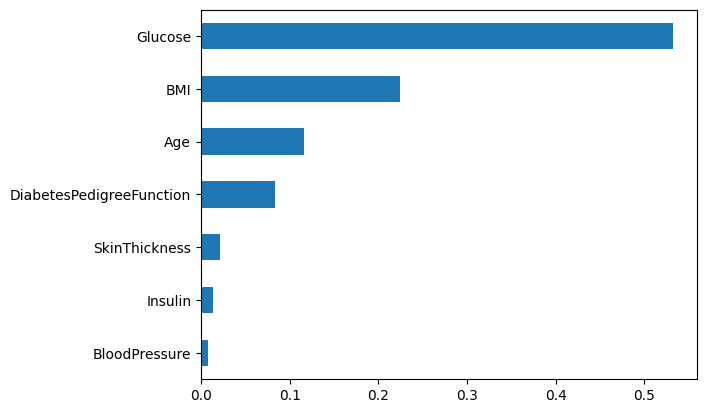

In [29]:
d1.sort_values().plot(kind='barh')